In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import re
import sys

import skimage.io as skio
import matplotlib.pyplot as plt

import numpy as np
import os
import sys
from math import sqrt

import cv2
import pandas as pd
import albumentations as A

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from scipy.special import expit, logit
from skimage.transform import rescale, resize, downscale_local_mean

import time

from PIL import Image
from skimage.feature import hog

from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from tensorflow import keras
from keras.utils import generic_utils
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D , BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adadelta,Adam

from sklearn.metrics import classification_report

import seaborn as sns

In [3]:
def ReadImageFolder(path):
    filepaths = [os.path.join(r,file) for r,d,f in os.walk( path) for file in f]
    ext = (".tif",".TIF",".jpg")
    filepaths = [x for x in filepaths if x.endswith(ext)]
    return filepaths

In [4]:
Labels = [ ]
Labels_String = ["actin" , "dna" , "endosome" , "er" , "golgia" , 
               "golgpp" , "lysosome" , "microtubules" , "mitochondria",
               "nucleolus"]

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin"
actin_paths = ReadImageFolder(path)
for i in range(len(actin_paths)):
  Labels.append(0)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/dna"
dna_paths = ReadImageFolder(path)
for i in range(len(dna_paths)):
  Labels.append(1)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/endosome"
endosome_paths = ReadImageFolder(path)
for i in range(len(endosome_paths)):
  Labels.append(2)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/er"
er_paths = ReadImageFolder(path)
for i in range(len(er_paths)):
  Labels.append(3)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/golgia"
golgia_paths = ReadImageFolder(path)
for i in range(len(golgia_paths)):
  Labels.append(4)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/golgpp"
golgpp_paths = ReadImageFolder(path)
for i in range(len(golgpp_paths)):
  Labels.append(5)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/lysosome"
lysosome_paths = ReadImageFolder(path)
for i in range(len(lysosome_paths)):
  Labels.append(6)


path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/microtubules"
microtubules_paths = ReadImageFolder(path)
for i in range(len(microtubules_paths)):
  Labels.append(7)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/mitochondria"
mitochondria_paths = ReadImageFolder(path)
for i in range(len(mitochondria_paths)):
  Labels.append(8)

path = "/content/drive/MyDrive/ColabNotebooks/DatasetPattern/nucleolus"
nucleolus_paths = ReadImageFolder(path)
for i in range(len(nucleolus_paths)):
  Labels.append(9)


Paths_Array = [actin_paths , dna_paths , endosome_paths , er_paths , golgia_paths , 
               golgpp_paths , lysosome_paths , microtubules_paths , mitochondria_paths,
               nucleolus_paths]

print(Paths_Array)

[['/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_001.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_002.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_072.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_067.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_070.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_009.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_007.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_068.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_011.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_004.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_069.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_010.tif', '/content/drive/MyDrive/ColabNotebooks/DatasetPattern/actin/actin_071.tif', '/content/

In [5]:
def PrepareImagesArray(paths,AllImages_Array):

    for i in paths:
      '''
      img = Image.open(i)
      img = img.convert('L')
      resized_Length = 128
      resized_Height = 128
      newsize = (resized_Length , resized_Height)
      out = img.resize(newsize, Image.LANCZOS)
      image = np.array(out)
      image = image.astype("float64")
      # image = (image / 255) - 0.5  # Old normalize
      image = (image - image.mean()) / (image.std() + 1e-8) # New Normalize
      #image_resized = resize(image, (resized_Length,resized_Height),
                        #anti_aliasing=False)
      #image_resized = image_resized * 255
      # image = image.reshape(36,36,1)

      #image = np.expand_dims(image, axis=0)   # For later use with 2nd code CNN
      #image = np.moveaxis(image, 0, 2)

      AllImages_Array.append(image)
      '''

      img_arr = cv2.imread(i,0) #convert BGR to RGB format
      img_arr = img_arr.astype(np.float64)
    # Reshaping images to preferred size
      img_arr = (img_arr - img_arr.mean()) / (img_arr.std()) # New Normalize
    
      AllImages_Array.append(img_arr)

In [6]:
AllImages_Array = [ ]
for i in Paths_Array:
  PrepareImagesArray(i,AllImages_Array)
AllImages_Array_np = np.array(AllImages_Array)

# Delete old images array
AllImages_Array = [ ]


In [7]:
Labels_encoded = to_categorical(Labels, num_classes = 10)

In [8]:
AllImages_Array_np = AllImages_Array_np.reshape(-1,382,382,1)

In [9]:
dummy_RGB_images = np.ndarray(shape=(AllImages_Array_np.shape[0], AllImages_Array_np.shape[1], AllImages_Array_np.shape[2], 3))

In [10]:
# Converting grayscale into a "fake" RGB channels filled with grayscale values
dummy_RGB_images[:, :, :, 0] = AllImages_Array_np[:, :, :, 0]
dummy_RGB_images[:, :, :, 1] = AllImages_Array_np[:, :, :, 0]
dummy_RGB_images[:, :, :, 2] = AllImages_Array_np[:, :, :, 0]

In [11]:
x_train , x_test , y_train , y_test = train_test_split(dummy_RGB_images , Labels_encoded, test_size=0.15)
x_train , x_valid , y_train , y_valid = train_test_split(x_train , y_train, test_size=0.18)
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)

print("x_valid shape",x_valid.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_valid shape",y_valid.shape)

# Delete images after splitting to save memory

AllImages_Array_np = [ ]

x_train shape (606, 382, 382, 3)
x_test shape (131, 382, 382, 3)
x_valid shape (134, 382, 382, 3)
y_train shape (606, 10)
y_test shape (131, 10)
y_valid shape (134, 10)


In [27]:
input_t = keras.Input(shape=(382,382,3))
res_model = keras.applications.ResNet50(include_top = False , weights="imagenet",input_tensor=input_t)

In [28]:
for layer in res_model.layers[:143]:
  layer.trainable = False

In [29]:
to_res = (382,382)
model = keras.models.Sequential()
model.add(keras.layers.Lambda(lambda image: tf.image.resize(image,to_res)))
model.add(res_model)
model.add(keras.layers.Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
check_point = keras.callbacks.ModelCheckpoint(filepath="resnet_test" , monitor='val_accuracy',mode="max",save_best_only = True)



In [31]:
model.compile( loss = 'categorical_crossentropy' , optimizer = "Adam",
              metrics = ['accuracy'])

history = model.fit(x_train,y_train,batch_size = 4 , epochs = 15, verbose = 1 , 
                    validation_data = (x_valid,y_valid), callbacks =[check_point])

model.summary()

Epoch 1/15
152/152 [==============================] - 40s 228ms/step - loss: 12.7654 - accuracy: 0.3696 - val_loss: 172.6157 - val_accuracy: 0.1119


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: resnet_test/assets


INFO:tensorflow:Assets written to: resnet_test/assets


Epoch 2/15
152/152 [==============================] - 33s 219ms/step - loss: 2.0182 - accuracy: 0.5165 - val_loss: 2.9270 - val_accuracy: 0.6642


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: resnet_test/assets
Epoch 3/15
152/152 [==============================] - 33s 219ms/step - loss: 1.3059 - accuracy: 0.5776 - val_loss: 99.6041 - val_accuracy: 0.2313
Epoch 4/15
152/152 [==============================] - 33s 218ms/step - loss: 1.2674 - accuracy: 0.6634 - val_loss: 4.9055 - val_accuracy: 0.6418
Epoch 5/15
152/152 [==============================] - 33s 219ms/step - loss: 0.8756 - accuracy: 0.7244 - val_loss: 26.4507 - val_accuracy: 0.4254
Epoch 6/15
152/152 [==============================] - 33s 219ms/step - loss: 0.7872 - accuracy: 0.7492 - val_loss: 2.9944 - val_accuracy: 0.6940


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: resnet_test/assets


INFO:tensorflow:Assets written to: resnet_test/assets


Epoch 7/15
152/152 [==============================] - 33s 220ms/step - loss: 0.6736 - accuracy: 0.7954 - val_loss: 2.0691 - val_accuracy: 0.7761


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: resnet_test/assets


INFO:tensorflow:Assets written to: resnet_test/assets


Epoch 8/15
152/152 [==============================] - 34s 220ms/step - loss: 0.5951 - accuracy: 0.8020 - val_loss: 3.7775 - val_accuracy: 0.7015
Epoch 9/15
152/152 [==============================] - 33s 220ms/step - loss: 0.7918 - accuracy: 0.7921 - val_loss: 1.3754 - val_accuracy: 0.8582


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: resnet_test/assets


INFO:tensorflow:Assets written to: resnet_test/assets


Epoch 10/15
152/152 [==============================] - 33s 220ms/step - loss: 0.7020 - accuracy: 0.7921 - val_loss: 3.2574 - val_accuracy: 0.6791
Epoch 11/15
152/152 [==============================] - 33s 220ms/step - loss: 0.5207 - accuracy: 0.8399 - val_loss: 1.7310 - val_accuracy: 0.7388
Epoch 12/15
152/152 [==============================] - 35s 228ms/step - loss: 0.5029 - accuracy: 0.8482 - val_loss: 20.1488 - val_accuracy: 0.2836
Epoch 13/15
152/152 [==============================] - 33s 220ms/step - loss: 0.6764 - accuracy: 0.8201 - val_loss: 16.7578 - val_accuracy: 0.4478
Epoch 14/15
152/152 [==============================] - 33s 220ms/step - loss: 0.5265 - accuracy: 0.8366 - val_loss: 16.7253 - val_accuracy: 0.5149
Epoch 15/15
152/152 [==============================] - 33s 220ms/step - loss: 0.5213 - accuracy: 0.8399 - val_loss: 5.1061 - val_accuracy: 0.5746
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Outp

In [35]:
test_eval = model.evaluate(x_test, y_test, verbose=1)

5/5 [==============================] - 3s 457ms/step - loss: 6.7886 - accuracy: 0.5496


In [43]:
model.load_weights("resnet_test")
test_eval = model.evaluate(x_test, y_test, verbose=1)

5/5 [==============================] - 3s 451ms/step - loss: 2.4879 - accuracy: 0.7939


In [49]:
model.save('Resnet_ImagesCells.h5py')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: Resnet_ImagesCells.h5py/assets


INFO:tensorflow:Assets written to: Resnet_ImagesCells.h5py/assets


In [50]:
!zip -r /content/Resnet_Zipped_ImagesCells.zip /content/Resnet_ImagesCells.h5py

updating: content/Resnet_ImagesCells.h5py/ (stored 0%)
updating: content/Resnet_ImagesCells.h5py/keras_metadata.pb (deflated 96%)
updating: content/Resnet_ImagesCells.h5py/assets/ (stored 0%)
updating: content/Resnet_ImagesCells.h5py/saved_model.pb (deflated 93%)
updating: content/Resnet_ImagesCells.h5py/variables/ (stored 0%)
updating: content/Resnet_ImagesCells.h5py/variables/variables.index (deflated 79%)
updating: content/Resnet_ImagesCells.h5py/variables/variables.data-00000-of-00001 (deflated 21%)


In [38]:
model_2 = keras.models.load_model("Resnet_ImagesCells.h5py")

In [45]:
predicted_classes_all = model.predict(x_test)
predicted_classes_all = np.argmax(predicted_classes_all,axis=1)

In [46]:
True_classes_all = np.argmax(y_test,axis = 1) 

In [47]:
target_names = ["Class: {}".format(Labels_String[i]) for i in range(10)]
print(classification_report(True_classes_all, predicted_classes_all, target_names=target_names))

                     precision    recall  f1-score   support

       Class: actin       0.93      0.88      0.90        16
         Class: dna       0.92      1.00      0.96        11
    Class: endosome       0.71      0.67      0.69        15
          Class: er       0.65      1.00      0.79        13
      Class: golgia       0.67      0.92      0.77        13
      Class: golgpp       1.00      0.53      0.70        15
    Class: lysosome       0.82      0.60      0.69        15
Class: microtubules       0.71      0.62      0.67         8
Class: mitochondria       1.00      0.73      0.84        11
   Class: nucleolus       0.78      1.00      0.88        14

           accuracy                           0.79       131
          macro avg       0.82      0.80      0.79       131
       weighted avg       0.82      0.79      0.79       131



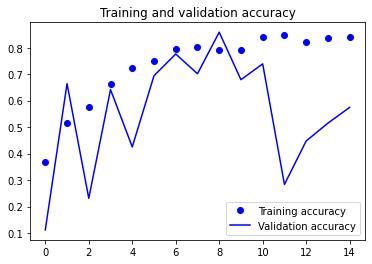

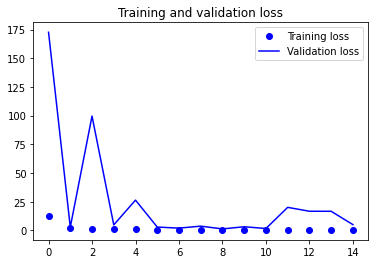

In [48]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()